In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [12]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
CollegeReviewCompiled = pd.read_excel(r'/content/CompileReviews-8-11-2022.xlsx')
CollegeReviewCompiled.tail(2)

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
331,0.30 s,NaN,2.0,5.0,2017,www.google.com,www.google.com,University of Limerick,University of Limerick,NaN
332,Karolina,NaN,3.0,5.0,2018,www.google.com,www.google.com,University of Limerick,University of Limerick,NaN


In [14]:
Sentiment_calc=CollegeReviewCompiled.drop(['Sentiment'], axis=1)

In [15]:
def sentiments(rating):
    if  (rating >= 3):
        return 1
   # elif (rating >= 3) and (rating < 4):
    #    return 'Neutral'
    elif (rating < 3):
        return 0
   # else: return 'Neutral'
# Add sentiments to the data
Sentiment_calc['Sentiment'] = Sentiment_calc['reviewRating'].apply(sentiments)

In [16]:
CollegeReviewCompiled=Sentiment_calc.drop(['author', 'ratingMaxvalue','dateCreated','reviewUrl','reviewSource','name','address','reviewRating'], axis=1)

In [17]:

CollegeReviewCompiled.reviewBody = CollegeReviewCompiled.reviewBody.fillna(' mess,bad,dirty,rude,dishonest,cheat,expensive,unworthy')

In [18]:

CollegeReviewCompiled.Sentiment = CollegeReviewCompiled.Sentiment.fillna(0)

In [19]:
CollegeReviewCompiled.tail()

,reviewBody,Sentiment
328,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
329,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
330,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
331,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
332,"mess,bad,dirty,rude,dishonest,cheat,expensive...",1.0


In [20]:
CollegeReviewCompiled = CollegeReviewCompiled.astype({'Sentiment':'int'})

In [21]:
CollegeReviewCompiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewBody  333 non-null    object
 1   Sentiment   333 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [22]:
CollegeReviewCompiled['Sentiment'].value_counts(normalize=True)

1    0.687688
0    0.312312
Name: Sentiment, dtype: float64

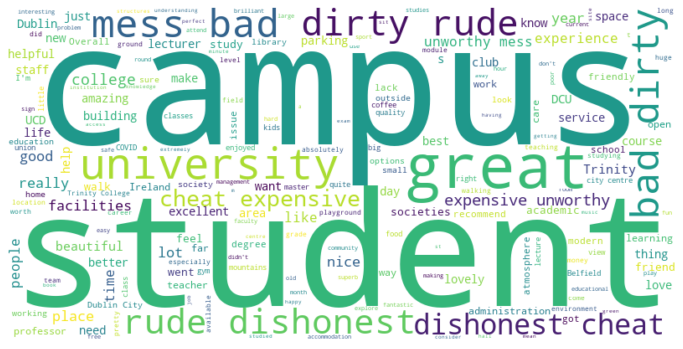

In [23]:

# Concatenate the text review data
reviews = " ".join(CollegeReviewCompiled["reviewBody"])
# Create the word cloud image
word_cloud=WordCloud(background_color="white",stopwords=ENGLISH_STOP_WORDS,
                     width=800,
                    height=400
                     )
# Generate the word oud using the review data
word_cloud.generate(reviews)
# Display the word cloud
plt.rcParams["figure.figsize"] = (12, 8)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:

# Specify the word pattern
pattern=r"[a-zA-Z]+"
# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(
token_pattern=pattern,
stop_words=ENGLISH_STOP_WORDS,
ngram_range=(1, 2),
max_features=500
)
vect.fit(CollegeReviewCompiled["reviewBody"])
# Create sparse matrix from the vectorizer
tokenized_features=vect.transform(CollegeReviewCompiled["reviewBody"])
# Create a DataFrame of the new features
features=pd.DataFrame(data=tokenized_features.toarray(),
columns=vect.get_feature_names_out())
features

,able,absolutely,academic,access,accommodation,administration,advice,amazing,amazing beautiful,amazing campus,...,went,wifi,wonderful,work,working,world,worst,worth,year,years
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,0.0,0.0,0.0,0.22626,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271795,0.0,0.23965
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
329,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
330,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
331,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000


In [25]:
print(tokenized_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.2717955  0.         0.23965037]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [26]:
print(vect.get_feature_names_out())

['able' 'absolutely' 'academic' 'access' 'accommodation' 'administration'
 'advice' 'amazing' 'amazing beautiful' 'amazing campus' 'amazing place'
 'american' 'approx' 'approx km' 'architecture' 'area' 'areas' 'array'
 'art' 'ask' 'atmosphere' 'attend' 'available' 'avoid' 'avoid place'
 'away' 'awful' 'bad' 'bad dirty' 'bar' 'based' 'basically' 'beautiful'
 'beautiful campus' 'beautiful feels' 'beautiful open' 'belfield' 'best'
 'best university' 'better' 'big' 'blocked' 'body' 'book' 'bridge'
 'brilliant' 'building' 'buildings' 'bus' 'cafeteria' 'campus'
 'campus beautiful' 'campus facilities' 'campus good' 'campus great'
 'campus nice' 'campus student' 'canteen' 'car' 'car parks' 'care'
 'career' 'careers' 'careers service' 'cctv' 'centre' 'changed' 'cheat'
 'cheat expensive' 'children' 'children s' 'choose' 'circular'
 'circular road' 'city' 'city centre' 'city dublin' 'city university'
 'class' 'classes' 'clear' 'close' 'club' 'clubs' 'clubs societies'
 'coffee' 'college' 'college 

In [27]:
# Generate a number of different length metrics based on the text
CollegeReviewCompiled["char_count"] = CollegeReviewCompiled["reviewBody"].str.count( "\S")
CollegeReviewCompiled["word_count"] = CollegeReviewCompiled["reviewBody"].str.count(pattern)
CollegeReviewCompiled["avg_word_length"] = CollegeReviewCompiled["char_count"] /CollegeReviewCompiled["word_count"]
# Preview our new columns
CollegeReviewCompiled.sample(3)

,reviewBody,Sentiment,char_count,word_count,avg_word_length
135,Great experience and learning altogether with ...,1,132,20,6.600000
2,I know this building has over 200 years of var...,1,209,44,4.750000
4,"Nice college grounds area for walking, jogging...",1,220,37,5.945946


In [28]:
CollegeReviewCompiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewBody       333 non-null    object 
 1   Sentiment        333 non-null    int64  
 2   char_count       333 non-null    int64  
 3   word_count       333 non-null    int64  
 4   avg_word_length  333 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 13.1+ KB


# **Implementing Machine Learning Algorithms**
## Random Forest, Decision Tree, Logistic Regression,K-Nearest Neighbors

#Train Test Split

In [29]:

# Define X and y
X = pd.concat([features, CollegeReviewCompiled.loc[:, "char_count":]], axis=1)
y =CollegeReviewCompiled["Sentiment"]
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
              X,
              y,
              test_size=0.25,
              random_state=42
)


# Train a random forest classifier

In [30]:

rf=RandomForestClassifier(random_state=42) .fit(X_train, y_train)
#Predict the labels.
y_pred=rf.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.85      0.92      0.88        61

    accuracy                           0.82        84
   macro avg       0.79      0.74      0.76        84
weighted avg       0.81      0.82      0.81        84



In [31]:
print(y_pred)

[1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 0]


# Print a confusion matrix for the model

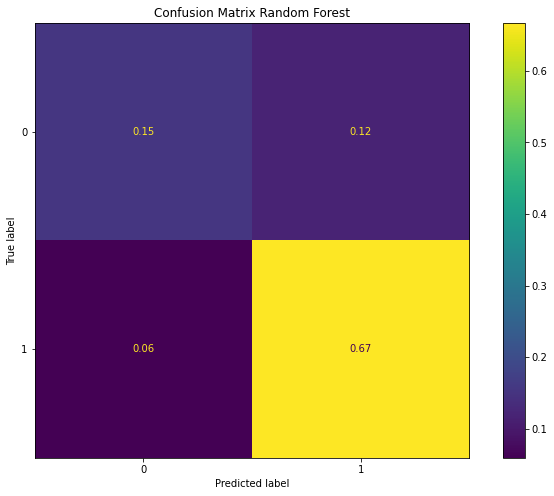

In [32]:


ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Random Forest")
plt.show()


## Visualize the feature importance

In [33]:
# Create a DataFrame of the features and their importances
pd.DataFrame(
{"feature": X.columns, "importance": rf.feature_importances_}
).sort_values(by="importance", ascending=False)

,feature,importance
500,char_count,0.033723
27,bad,0.032274
502,avg_word_length,0.030666
501,word_count,0.028064
432,t,0.023781
...,...,...
279,master,0.000000
343,playing,0.000000
301,needs,0.000000
400,social,0.000000


#Decision Tree

In [34]:

dt=DecisionTreeClassifier(random_state=42) .fit(X_train, y_train)
#Predict the labels.
y_pred=dt.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        23
           1       0.85      0.85      0.85        61

    accuracy                           0.79        84
   macro avg       0.73      0.73      0.73        84
weighted avg       0.79      0.79      0.79        84



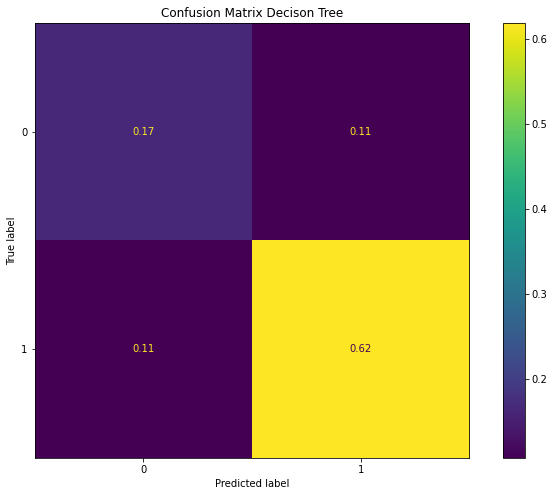

In [35]:

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Decison Tree")
plt.show()


In [36]:
# Create a DataFrame of the features and their importances
pd.DataFrame(
{"feature": X.columns, "importance": dt.feature_importances_}
).sort_values(by="importance", ascending=False)

,feature,importance
27,bad,0.202219
432,t,0.106767
204,having,0.060371
300,need,0.052518
248,left,0.050462
...,...,...
165,fields,0.000000
164,field,0.000000
163,felt,0.000000
162,feels likes,0.000000


#Logistic Regression Classifier

In [37]:
#lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms provided by Scikit-Learn Library.


lr=LogisticRegression(random_state=42,solver='lbfgs', max_iter=100).fit(X_train, y_train)
#Predict the labels.
y_pred=dt.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.61      0.61      0.61        23
           1       0.85      0.85      0.85        61

    accuracy                           0.79        84
   macro avg       0.73      0.73      0.73        84
weighted avg       0.79      0.79      0.79        84



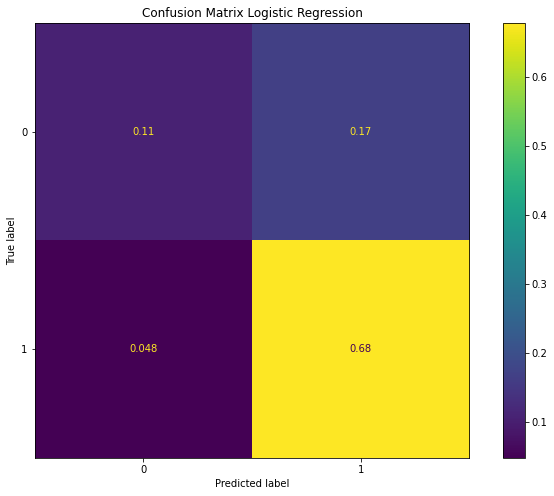

In [38]:

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Logistic Regression")
plt.show()


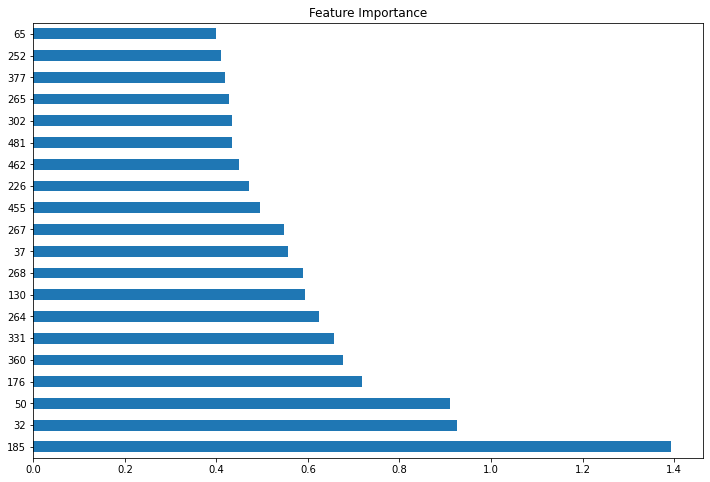

In [39]:
# Create a DataFrame of the features and their importances
#pd.DataFrame(
#{"feature": X.columns, "importance": lr.feature_importances_}
#).sort_values(by="importance", ascending=False)


importance = lr.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')



from sklearn.neighbors import KNeighborsClassifier

## KNeighborsClassifier

In [40]:

kn=KNeighborsClassifier(n_neighbors=3) .fit(X_train, y_train)
#Predict the labels.
y_pred=kn.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.63        23
           1       0.86      0.84      0.85        61

    accuracy                           0.79        84
   macro avg       0.73      0.74      0.74        84
weighted avg       0.79      0.79      0.79        84



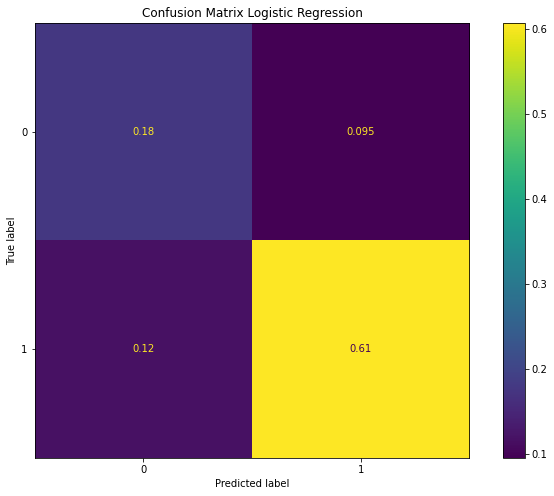

In [41]:

ConfusionMatrixDisplay.from_estimator(kn, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Logistic Regression")
plt.show()


## Testing and Verification in progress

In [42]:
# initialize list elements
data = ["The College is nice and good"]

# Using 'Address' as the column name
# and equating it to the list

# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['revws'])

# print dataframe.
df

#CollegeReviewCompiled["reviewBody"]

,revws
0,The College is nice and good


In [43]:
sentimen = [0]
df['sentimen'] = sentimen
  

In [44]:
df

,revws,sentimen
0,The College is nice and good,0


In [45]:
# Specify the word pattern
pattern=r"[a-zA-Z]+"
# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(
token_pattern=pattern,
stop_words=ENGLISH_STOP_WORDS,
ngram_range=(1, 2),
max_features=500
)
vect.fit(df["revws"])
# Create sparse matrix from the vectorizer
tokenized_features=vect.transform(df["revws"])
# Create a DataFrame of the new features
features=pd.DataFrame(data=tokenized_features.toarray(),
columns=vect.get_feature_names_out())
features

,college,college nice,good,nice,nice good
0,0.447214,0.447214,0.447214,0.447214,0.447214


In [46]:
print(vect.get_feature_names_out())

['college' 'college nice' 'good' 'nice' 'nice good']


In [47]:
print(tokenized_features.toarray())

[[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]]


In [48]:

# # Define X and y
# X = pd.concat([features, df.loc[:, "char_count":]], axis=1)
# y =df["sentimen"]
# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#               X,
#               y,
#               test_size=0.25,
#               random_state=42
# )


ValueError: ignored

## NLP for sentiment analysis

In [51]:
Sentiment_calc.head()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5.0,5.0,2014,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5.0,5.0,2014,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
2,Omar Nicolai,I know this building has over 200 years of var...,5.0,5.0,2014,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5.0,5.0,2014,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5.0,5.0,2014,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0


In [52]:
Sentiment_calc.reviewBody = Sentiment_calc.reviewBody.fillna(' mess,bad,dirty,rude,dishonest,cheat,expensive,unworthy')
Sentiment_calc.reviewRating = Sentiment_calc.reviewBody.fillna(1)

In [53]:
Sentiment_calc.tail(5)

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
328,Keith Guinan,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,2017,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
329,Cat K,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,2018,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
330,Sarune _,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,2018,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
331,0.30 s,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,2017,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
332,Karolina,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,2018,www.google.com,www.google.com,University of Limerick,University of Limerick,1.0


In [54]:
Sentiment_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author          333 non-null    object 
 1   reviewBody      333 non-null    object 
 2   reviewRating    333 non-null    object 
 3   ratingMaxvalue  332 non-null    float64
 4   dateCreated     333 non-null    int64  
 5   reviewUrl       333 non-null    object 
 6   reviewSource    333 non-null    object 
 7   name            333 non-null    object 
 8   address         333 non-null    object 
 9   Sentiment       332 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 26.1+ KB


In [55]:
Sentiment_calc['dateCreated'] = pd.to_datetime(Sentiment_calc['dateCreated'], format='%Y%')

In [56]:
Sentiment_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   author          333 non-null    object        
 1   reviewBody      333 non-null    object        
 2   reviewRating    333 non-null    object        
 3   ratingMaxvalue  332 non-null    float64       
 4   dateCreated     333 non-null    datetime64[ns]
 5   reviewUrl       333 non-null    object        
 6   reviewSource    333 non-null    object        
 7   name            333 non-null    object        
 8   address         333 non-null    object        
 9   Sentiment       332 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 26.1+ KB


In [57]:
len(Sentiment_calc)

333

In [65]:
Sentiment_calc.dtypes

author                    object
reviewBody                object
reviewRating              object
ratingMaxvalue           float64
dateCreated       datetime64[ns]
reviewUrl                 object
reviewSource              object
name                      object
address                   object
Sentiment                  Int64
dtype: object

In [59]:
np.sum(Sentiment_calc.isnull().any(axis=1))

1

In [62]:
Sentiment_calc['Sentiment'].unique()

array([ 1.,  0., nan])

In [61]:
Sentiment_calc.fillna(0)

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,Stunning new university campus near Dublin cit...,5.0,1970-01-01 00:00:00.000002014,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...","Great campus to go for a walk, and with a coup...",5.0,1970-01-01 00:00:00.000002014,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
2,Omar Nicolai,I know this building has over 200 years of var...,I know this building has over 200 years of var...,5.0,1970-01-01 00:00:00.000002014,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
3,ruth connolly,Great place to sit or exercise. Well kept safe...,Great place to sit or exercise. Well kept safe...,5.0,1970-01-01 00:00:00.000002014,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
4,Fintan Moloney,"Nice college grounds area for walking, jogging...","Nice college grounds area for walking, jogging...",5.0,1970-01-01 00:00:00.000002014,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
...,...,...,...,...,...,...,...,...,...,...
328,Keith Guinan,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,1970-01-01 00:00:00.000002017,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
329,Cat K,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,1970-01-01 00:00:00.000002018,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
330,Sarune _,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,1970-01-01 00:00:00.000002018,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0
331,0.30 s,"mess,bad,dirty,rude,dishonest,cheat,expensive...","mess,bad,dirty,rude,dishonest,cheat,expensive...",5.0,1970-01-01 00:00:00.000002017,www.google.com,www.google.com,University of Limerick,University of Limerick,0.0


In [64]:
Sentiment_calc['Sentiment'] = Sentiment_calc['Sentiment'].astype("Int64")

In [68]:
Sentiment_calc['Sentiment'].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [67]:
Sentiment_calc = Sentiment_calc.dropna()

In [69]:
Sentiment_calc['Sentiment'].nunique()

2

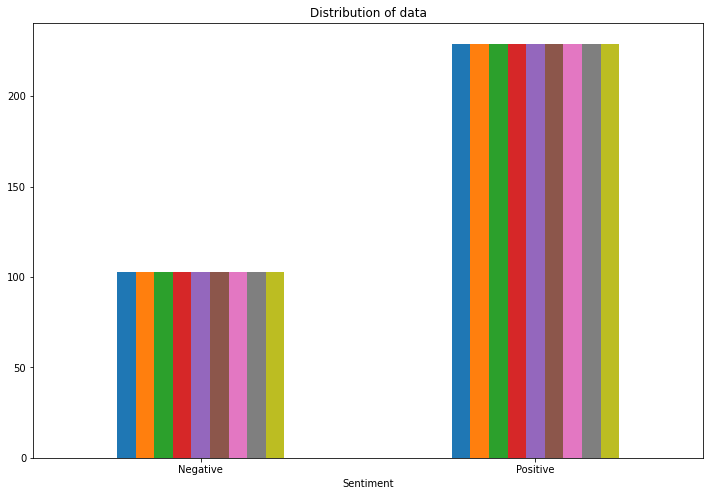

In [74]:
# Plotting the distribution for dataset.
ax = Sentiment_calc.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(Sentiment_calc['reviewBody']), list(Sentiment_calc['Sentiment'])

In [75]:
data=Sentiment_calc[['reviewBody','Sentiment']]

In [77]:
data['Sentiment'].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [78]:
data_pos = data[data['Sentiment'] == 1]
data_neg = data[data['Sentiment'] == 0]

In [79]:
dataset = pd.concat([data_pos, data_neg])

In [81]:
dataset['reviewBody']=dataset['reviewBody'].str.lower()
dataset['reviewBody'].head()

0    stunning new university campus near dublin cit...
1    great campus to go for a walk, and with a coup...
2    i know this building has over 200 years of var...
3    great place to sit or exercise. well kept safe...
4    nice college grounds area for walking, jogging...
Name: reviewBody, dtype: object

In [82]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [85]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['reviewBody'] = dataset['reviewBody'].apply(lambda text: cleaning_stopwords(text))
dataset['reviewBody'].head()

0    stunning new university campus near dublin cit...
1    great campus go walk, couple options easily ga...
2    know building over 200 years varied history fi...
3    great place sit exercise. well kept safe area....
4    nice college grounds area walking, jogging, ex...
Name: reviewBody, dtype: object

In [87]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [88]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['reviewBody'] = dataset['reviewBody'].apply(lambda x: cleaning_repeating_char(x))
dataset['reviewBody'].tail()

325                                                 bad.
328    mess,bad,dirty,rude,dishonest,cheat,expensive,...
329    mess,bad,dirty,rude,dishonest,cheat,expensive,...
330    mess,bad,dirty,rude,dishonest,cheat,expensive,...
331    mess,bad,dirty,rude,dishonest,cheat,expensive,...
Name: reviewBody, dtype: object

In [90]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['reviewBody'] = dataset['reviewBody'].apply(lambda x: cleaning_numbers(x))
dataset['reviewBody'].head()

0    stunning new university campus near dublin cit...
1    great campus go walk, couple options easily ga...
2    know building over  years varied history find ...
3    great place sit exercise. well kept safe area....
4    nice college grounds area walking, jogging, ex...
Name: reviewBody, dtype: object

In [91]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['reviewBody'] = dataset['reviewBody'].apply(tokenizer.tokenize)
dataset['reviewBody'].head()

0          [w]
1    [w, w, w]
2    [w, w, w]
3       [w, w]
4       [w, w]
Name: reviewBody, dtype: object

In [92]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['reviewBody']= dataset['reviewBody'].apply(lambda x: stemming_on_text(x))
dataset['reviewBody'].head()

0          [w]
1    [w, w, w]
2    [w, w, w]
3       [w, w]
4       [w, w]
Name: reviewBody, dtype: object

In [96]:
 import nltk
 nltk.download('wordnet')
 nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [97]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['reviewBody'] = dataset['reviewBody'].apply(lambda x: lemmatizer_on_text(x))
dataset['reviewBody'].head()

0          [w]
1    [w, w, w]
2    [w, w, w]
3       [w, w]
4       [w, w]
Name: reviewBody, dtype: object

In [112]:
X=data.reviewBody
y=data.Sentiment
y=y.astype('int')

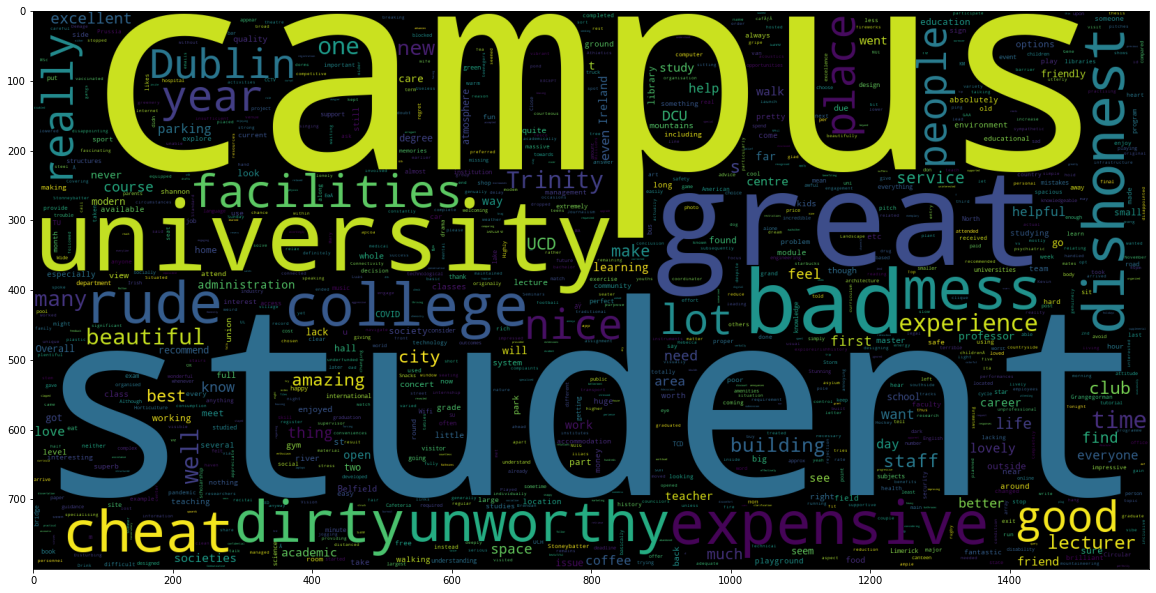

In [113]:
data_neg = data['reviewBody']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

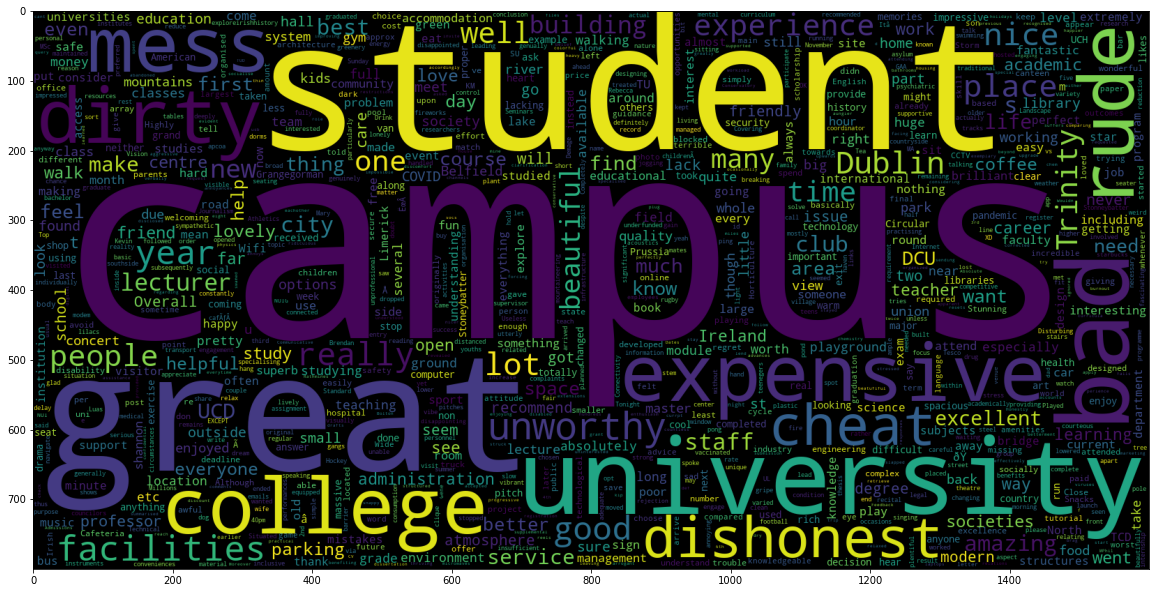

In [114]:
data_pos = data['reviewBody']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [115]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [116]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  8929


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [117]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [118]:
def model_Evaluate(model):
# Predict values for Test dataset
 y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
 print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
 cf_matrix = confusion_matrix(y_test, y_pred)
 categories = ['Negative','Positive']
 group_names = ['True Neg','False Pos', 'False Neg','True Pos']
 group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
 xticklabels = categories, yticklabels = categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
 plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.87      1.00      0.93        13

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



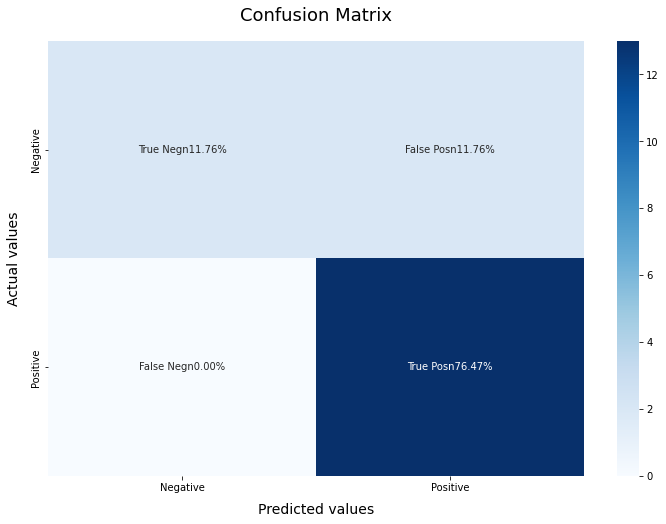

In [119]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [120]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [122]:
print(X_test)

  (0, 6786)	0.4781929509240194
  (0, 4834)	0.23870355125091625
  (0, 4589)	0.30977432299637553
  (0, 4258)	0.4781929509240194
  (0, 3439)	0.2924632048471218
  (0, 2814)	0.2038792085719472
  (0, 1909)	0.512466612500875
  (1, 8895)	0.13517032584732627
  (1, 8856)	0.09909766417304308
  (1, 8351)	0.14967779454577088
  (1, 8205)	0.16299114067923198
  (1, 7790)	0.18575045622005407
  (1, 7744)	0.1376036427093735
  (1, 7726)	0.12816855979637312
  (1, 7444)	0.1990638023535152
  (1, 7231)	0.057519783594769405
  (1, 7004)	0.1990638023535152
  (1, 6867)	0.11125879553491211
  (1, 6443)	0.18575045622005407
  (1, 5731)	0.1376036427093735
  (1, 5720)	0.10603594578811366
  (1, 5350)	0.1990638023535152
  (1, 5345)	0.11747250959758788
  (1, 5080)	0.1990638023535152
  (1, 5061)	0.10701616041959101
  :	:
  (16, 1354)	0.054058102795341866
  (16, 1329)	0.058755623918134214
  (16, 1311)	0.08942953227946224
  (16, 1306)	0.07482415190280821
  (16, 1284)	0.08942953227946224
  (16, 1283)	0.08344850356548424
  (16